In [1]:
import os
import joblib
import pandas as pd
import PyPDF2

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


ML MODEL

In [2]:
# Paths
data_dir = 'dataset/data/data'
models_dir = 'dataset/task_result/models'
categorized_dir = 'dataset/task_result/categorized_resumes'
csv_dir = 'dataset/task_result/csv_resume'
os.makedirs(models_dir, exist_ok=True)
os.makedirs(categorized_dir, exist_ok=True)
os.makedirs(csv_dir, exist_ok=True)

# Step 1: Data Exploration and Preprocessing
categories = []
documents = []
labels = []

In [4]:
# Read the dataset and extract text from PDFs
for category in os.listdir(data_dir):
    category_path = os.path.join(data_dir, category)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            if filename.endswith(".pdf"):
                categories.append(category)
                file_path = os.path.join(category_path, filename)
                try:
                    with open(file_path, "rb") as f:
                        pdf_reader = PyPDF2.PdfReader(f)
                        text = " ".join([page.extract_text() for page in pdf_reader.pages])
                        documents.append(text)
                        labels.append(category)
                except Exception as e:
                    print(f"Error reading {file_path}: {e}")


In [5]:
# Convert to DataFrame
df = pd.DataFrame({"text": documents, "category": labels})
print(df["category"].value_counts())  # Examine distribution of categories


category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
ACCOUNTANT                118
ADVOCATE                  118
CHEF                      118
ENGINEERING               118
FINANCE                   118
AVIATION                  117
FITNESS                   117
SALES                     116
HEALTHCARE                115
CONSULTANT                115
BANKING                   115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64


In [6]:
# Step 2: Process the resumes into a suitable format for training
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df["text"])
y = df["category"]


In [7]:
# Split the dataset
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Model Selection and Training
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Save the model and vectorizer
joblib.dump(model, os.path.join(models_dir, 'resume_categorizer.pkl'))
joblib.dump(vectorizer, os.path.join(models_dir, 'tfidf_vectorizer.pkl'))


['dataset/task_result/models\\tfidf_vectorizer.pkl']

In [8]:
# Evaluation
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

                        precision    recall  f1-score   support

            ACCOUNTANT       0.58      0.79      0.67        19
              ADVOCATE       0.42      0.57      0.48        23
           AGRICULTURE       0.67      0.25      0.36        16
               APPAREL       0.43      0.23      0.30        13
                  ARTS       0.50      0.18      0.27        33
            AUTOMOBILE       0.00      0.00      0.00         9
              AVIATION       0.67      0.77      0.71        26
               BANKING       0.45      0.59      0.51        17
                   BPO       0.00      0.00      0.00         5
  BUSINESS-DEVELOPMENT       0.59      0.80      0.68        20
                  CHEF       0.81      0.76      0.79        17
          CONSTRUCTION       0.87      0.71      0.78        28
            CONSULTANT       0.54      0.35      0.42        20
              DESIGNER       1.00      0.85      0.92        26
         DIGITAL-MEDIA       0.72      

e:\Task\BusAutomation_Task\vEnv_ResumeCategorizer\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Task\BusAutomation_Task\vEnv_ResumeCategorizer\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
e:\Task\BusAutomation_Task\vEnv_ResumeCategorizer\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

In [9]:
# Evaluate the model
y_pred_val = model.predict(X_val)
print(f"Accuracy: {accuracy_score(y_val, y_pred_val)}")
print(f"Precision: {precision_score(y_val, y_pred_val, average='weighted')}")
print(f"Recall: {recall_score(y_val, y_pred_val, average='weighted')}")
print(f"F1-score: {f1_score(y_val, y_pred_val, average='weighted')}")

Accuracy: 0.635814889336016
Precision: 0.632989277459984
Recall: 0.635814889336016
F1-score: 0.6149618154852008


e:\Task\BusAutomation_Task\vEnv_ResumeCategorizer\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Evaluation Insights


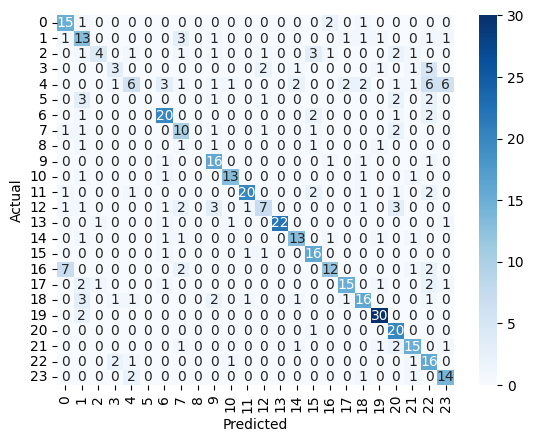

In [10]:
conf_mat = confusion_matrix(y_val, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
